# Topic 1: Forecast the prices of Avocado in the US

## Business Objective/Problem
 - Bơ “Hass”, một công ty có trụ sở tại Mexico,
chuyên sản xuất nhiều loại quả bơ được bán
ở Mỹ. Họ đã rất thành công trong những năm
gần đây và muốn mở rộng. Vì vậy, họ muốn
xây dựng mô hình hợp lý để dự đoán giá
trung bình của bơ “Hass” ở Mỹ nhằm xem
xét việc mở rộng các loại trang trại Bơ đang
có cho việc trồng bơ ở các vùng khác.

## Triển khai dự án
### <font color='red'> Bước 1: Business Understanding
Dựa vào mô tả nói trên (hoặc sau khi đặt ra các câu
hỏi cụ thể cho doanh nghiệp và các đối tượng có liên
quan) => xác định được vấn đề:
- Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của
nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được
đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags),
và có 3 PLU (Product Look Up) khác nhau (4046, 4225,
4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho
việc mở rộng.
- => Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung
bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất,
kinh doanh.

### <font color='red'>Bước 2: Data Understanding/ Acquire
#### Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ
liệu mà công ty đang có:
- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán
lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng
tuần cho lượng bán lẻ (National retail volume- units) và giá
bơ từ tháng 4/2015 đến tháng 3/2018.
- Giá Trung bình (Average Price) trong bảng phản ánh giá
trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ)
được bán trong bao.
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong
bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm
khác.


### Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 record. Với các cột:
  - Date - ngày ghi nhận
  - AveragePrice – giá trung bình của một quả bơ
  - Type - conventional / organic – loại: thông thường/ hữu cơ
  - Region – vùng được bán
  - Total Volume – tổng số bơ đã bán
  - 4046 – tổng số bơ có mã PLU 4046 đã bán
  - 4225 - tổng số bơ có mã PLU 4225 đã bán
  - 4770 - tổng số bơ có mã PLU 4770 đã bán
  - Total Bags – tổng số túi đã bán
  - Small/Large/XLarge Bags – tổng số túi đã bán theo size

Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều
này cho phép chúng ta thực hiện tất cả các loại phân tích cho
các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một
trong hai loại bơ.



=> Có thể tập trung giải quyết hai bài toán
- Bài toán 1: USA’s Avocado AveragePrice
Prediction – Sử dụng các thuật toán Regression
như Linear Regression, Random Forest,
XGB Regressor...
- Bài toán 2: Conventional/Organic Avocado
Average Price Prediction for the future in
California/NewYork… - sử dụng các thuật toán
Time Series như ARIMA, Prophet...

### <font color='red'> Bước 3: Data preparation/ Prepare

In [1]:
! pip install fbprophet
! pip install pandas-profiling==2.7.1
! pip install pmdarima
! pip install xgboost

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_1'

/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_1


In [4]:
# import libraries
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from pandas_profiling import ProfileReport

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import  seasonal_decompose

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Đọc dữ liệu

In [5]:
data = pd.read_csv('avocado.csv')

In [6]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data = data.drop('Unnamed: 0', axis = 1)

In [8]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


## Bài Toán 4: Hãy chọn ra một vùng (trong danh sách các vùng hang bơ “Hass” đang kinh doanh) mà bạn cho rằng trong tương lai có thể mở rộng trồng trọt, sản xuất và kinh doanh (Organic và/ hoặc Conventional Avocado). Hãy chứng minh điều này bằng cách triển khai các bài toán như đã làm với vùng California.

#### Use DataFrame df

In [10]:
df = data.copy(deep=True)

### 1. Kiểm tra dữ liệu: EDA

In [11]:
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Lựa chọn bài toán:
- Chọn một vùng để mở rộng kinh doan bơ Organic, nên bài làm chỉ xem xét đến loại Bơ Organic
- Để mở rộng kinh doanh thì chúng ta xem xét đến giá cả ở vùng đó và sản lượng tiêu thụ, và doanh số bán hàng tại khu vực đó. Với doanh số bán hàng = Đơn Giá trung bình * Tổng sản lưởng

In [15]:
# Tổng sản lượng bơ tiêu thụ
# df.groupby('region').sum('Total Volume')[['AveragePrice','Total Volume']].sort_values(by = 'Total Volume', ascending=False)

In [16]:
# Doanh số và sản lượng
df['Sales'] = df['AveragePrice']*df['Total Volume']
df_sales = df[df['type']=='organic'].groupby('region').sum('Sales')[['AveragePrice','Total Volume','Sales']].sort_values(by = 'Sales', ascending=False)
df_sales

,AveragePrice,Total Volume,Sales
region,,,
TotalUS,261.28,1.635186e+08,2.530573e+08
West,263.53,3.741857e+07,5.511584e+07
Northeast,314.24,2.422610e+07,4.401435e+07
California,284.80,2.538481e+07,4.177630e+07
GreatLakes,252.69,2.207469e+07,3.225104e+07
Midsouth,270.80,1.798044e+07,2.886040e+07
SouthCentral,225.29,1.811846e+07,2.353734e+07
LosAngeles,245.99,1.338628e+07,1.878028e+07
NewYork,346.96,8.990571e+06,1.759594e+07


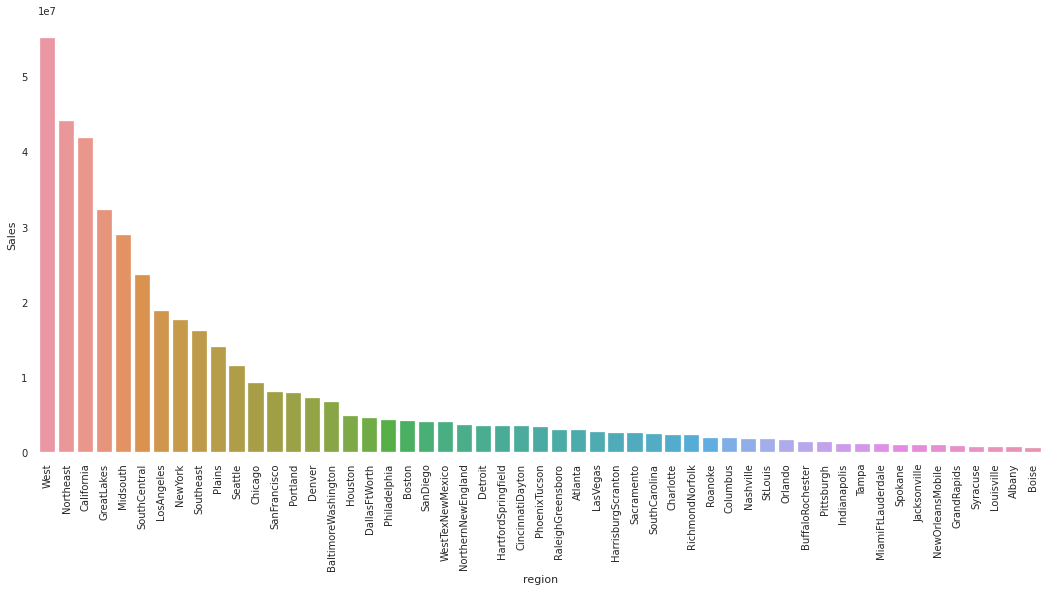

In [17]:
plt.figure(figsize=(18,8))
sns.barplot(df_sales.tail(53).index, df_sales.tail(53)['Sales']) # Biểu đồ đã được loại bỏ TotalUS để trực quan rõ hơn
plt.xticks(rotation = 90)
plt.show()

In [18]:
# Giá bơ trung bình ở mỗi vùng
df_avrprice = df[df['type']=='organic'].groupby('region').mean('AveragePrice')[['AveragePrice','Total Volume','Sales']].sort_values(by = 'AveragePrice', ascending=False)
df_avrprice

,AveragePrice,Total Volume,Sales
region,,,
HartfordSpringfield,2.229231,9522.564379,2.053099e+04
SanFrancisco,2.211243,22401.986331,4.745454e+04
NewYork,2.053018,53198.647337,1.041180e+05
Sacramento,1.969172,7994.574793,1.497224e+04
Charlotte,1.936982,7057.222840,1.350302e+04
RaleighGreensboro,1.883136,9374.890888,1.776939e+04
Philadelphia,1.867929,13959.191598,2.496809e+04
Northeast,1.859408,143349.681006,2.604400e+05
Jacksonville,1.828284,3100.421243,5.584378e+03


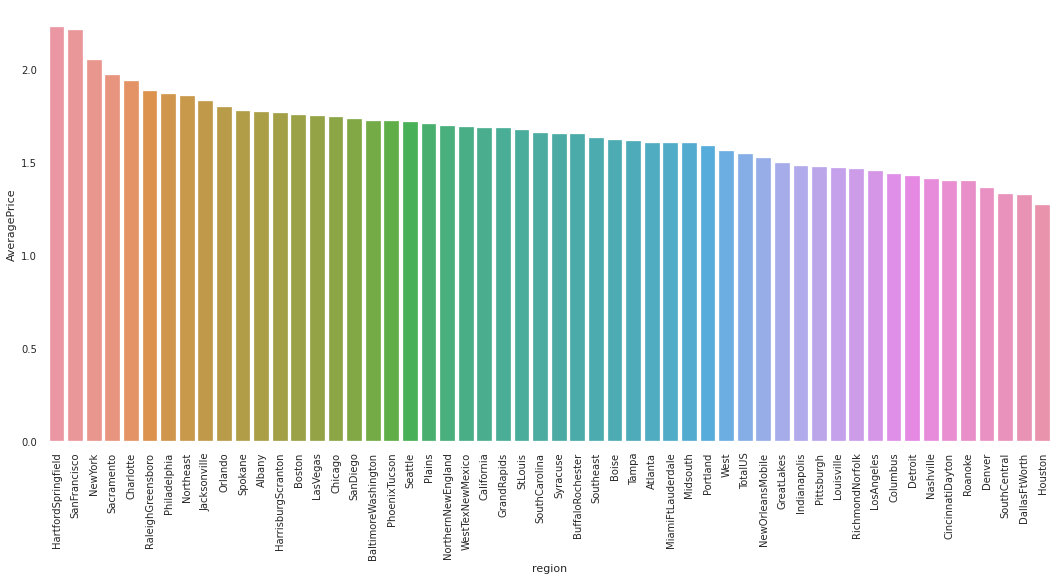

In [19]:
plt.figure(figsize=(18,8))
sns.barplot(df_avrprice.index, df_avrprice['AveragePrice'])
plt.xticks(rotation = 90)
plt.show()

- Từ dữ liệu của 2 bảng dữ liệu trên, lựa chọn ra một list danh sách là các vùng của Mỹ có doanh số bán hàng (Sales) và giá trung bình (AveragePrice) cao để tiếp tục phân tích và lựa chọn vùng phù hợp để mở rộng sản xuất và kinh doanh bơ trong tương lai

In [20]:
lst_bang = []
df_sales.head(20).index
for i in df_sales.head(15).index:
  if i in df_avrprice.head(20).index:
    lst_bang.append(i)
lst_bang


['Northeast', 'NewYork', 'Seattle', 'Chicago', 'SanFrancisco']

Trong ba khu vực được chọn ra ['Northeast', 'NewYork', 'Seattle', 'Chicago', 'SanFrancisco'] thì Northeast là một vùng bao gồm nhiều bang tại Mỹ, vì vậy chúng ta chỉ xem xét tiếp lựa chọn một trong các  vùng còn lại là , ['NewYork', 'Seattle', 'Chicago', 'SanFrancisco']

In [21]:
lst_bang = [ 'NewYork', 'Seattle', 'Chicago', 'SanFrancisco']

NewYork


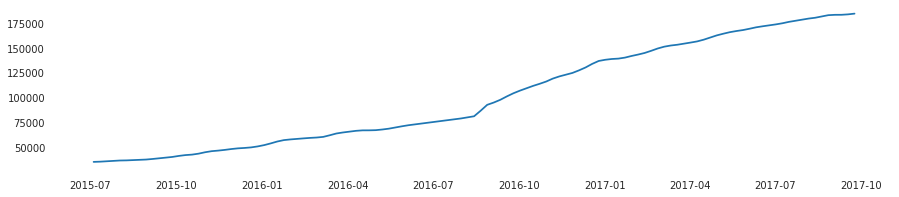

--------------------
Seattle


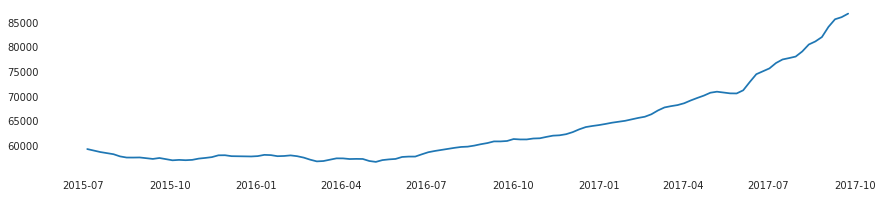

--------------------
Chicago


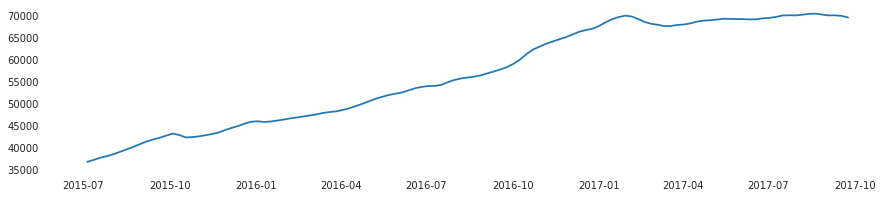

--------------------
SanFrancisco


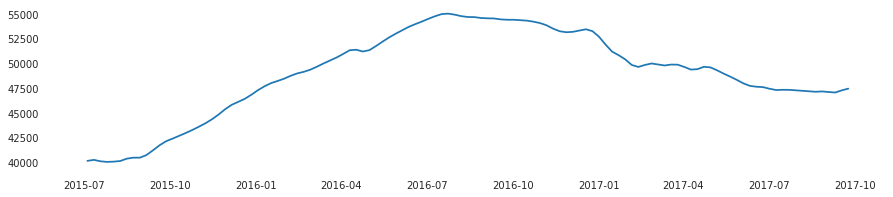

--------------------


In [22]:
# Xem xu hướng của các vùng trong lst_bang:
for i in lst_bang:
  print(i)
  df_trend = df[(df['type']=='organic') & (df['region']==i)][['Date','Sales']].sort_values("Date")
  df_trend.index = pd.to_datetime(df_trend.Date)
  df_trend = df_trend.drop('Date', axis = 1)
  result = seasonal_decompose(df_trend, model= 'multiplicative')
  plt.figure(figsize=(15,3))
  plt.plot(result.trend)
  plt.show()
  print('-'*20)

- Trong 4 bang trên:
  - NewYork có doanh số bán hàng tăng đều từ năm 2015 đến 2017 và vẫn có xu hướng tiếp tục tăng trong tương lai
  - Seattle có doanh số có giảm nhẹ từ giữa năm 2016 đến giữa năm 2017. Từ giữa năm 2017 đến năm 2018 thì có xu hướng tăng
  - Chicago doanh số tăng từ năm 2015 đến năm 2017 và bị ít thay đổi từ năm 2017 đên 2018
  - SanFrancico có doanh số tăng từ năm 2015 đến tháng 7 năm 2016, và có xu hướng giảm từ năm 2016 đến năm 2017
- > Chọn vùng NewYork

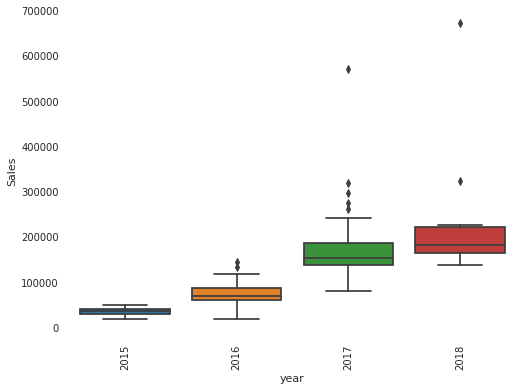

In [23]:
# Xem doanh số bán hàng của bơ organic tại Newyork theo năm
# print(f'{i} - region')
plt.figure(figsize=(8,6))
sns.boxplot(data=df[(df['type']=='organic') & (df['region']=='NewYork')], x = 'year', y = 'Sales')
plt.xticks(rotation = 90)
plt.show()

# Áp Dụng Model
- Dự đoán doanh số bán hàng (Sales) bơ Organic tại NewYork trong tương lai

In [24]:
# Tạo một DataFrame mới chứa sản lượng bơ organic của bang NewYork
df4 = df[(df['type']=='organic') & (df['region']=='NewYork')][['Date','Sales']].sort_values("Date")

In [25]:
df4.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object

In [26]:
df4.columns = ['ds','y']

In [27]:
df4 = df4.reset_index().drop('index', axis = 1)

In [28]:
df4.head()

,ds,y
0,2015-01-04,33443.5032
1,2015-01-11,30080.4791
2,2015-01-18,19145.9424
3,2015-01-25,28961.3864
4,2015-02-01,47666.8312


In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [30]:
df4.tail()

,ds,y
164,2018-02-25,192861.6048
165,2018-03-04,226068.1228
166,2018-03-11,207578.9376
167,2018-03-18,322037.8680
168,2018-03-25,220416.6030


In [31]:
df4.head()

,ds,y
0,2015-01-04,33443.5032
1,2015-01-11,30080.4791
2,2015-01-18,19145.9424
3,2015-01-25,28961.3864
4,2015-02-01,47666.8312


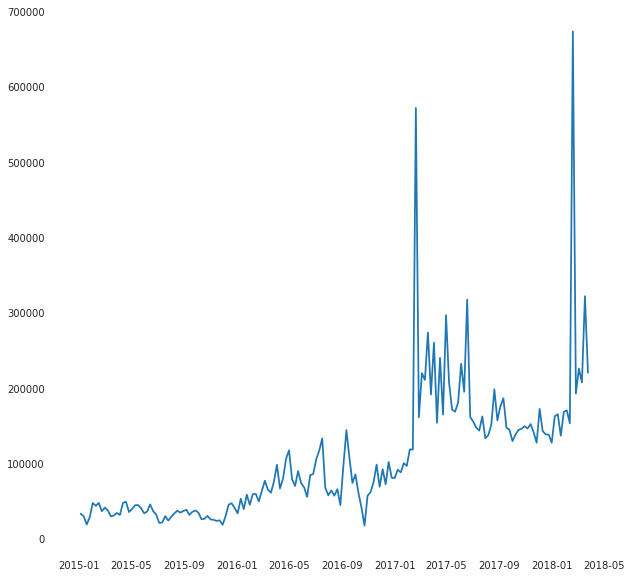

In [32]:
# Trực quan hóa dữ liệu ban đầu
plt.figure(figsize=(10,10))
plt.plot(df4['ds'], df4['y'])
plt.show()

- Doanh số bán bơ tăng nhẹ tại NewYork từ tháng 1 năm 2015 đến cuối năm 2016 và bỗng tăng mạnh vào đầu năm 2017 sau đó giảm mạnh đến cuối năm 2017 và tăng mạnh trở ại vào đầu năm 2018

In [33]:
df_arima = df4.copy(deep = True)
df_arima.index = pd.to_datetime(df_arima.ds)
df_arima = df_arima.drop('ds', axis = 1)
df_arima.head()

,y
ds,
2015-01-04,33443.5032
2015-01-11,30080.4791
2015-01-18,19145.9424
2015-01-25,28961.3864
2015-02-01,47666.8312


# Decomposition

In [34]:
from statsmodels.tsa.seasonal import  seasonal_decompose
result = seasonal_decompose(df_arima, model= 'multiplicative')
result

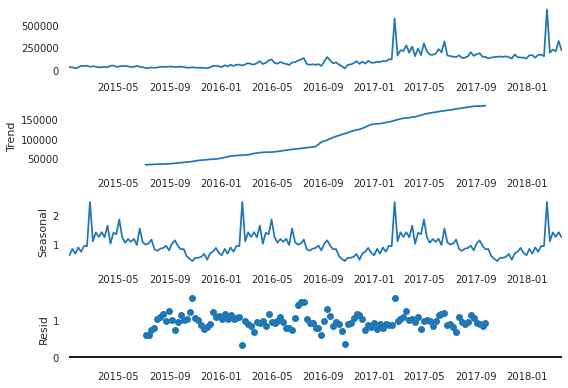

In [35]:
result.plot()
plt.show()

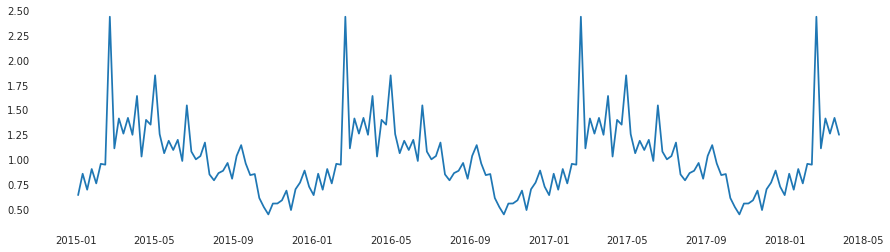

In [36]:
# Trực quan hóa seasonal
plt.figure(figsize=(15,4))
plt.plot(result.seasonal)
plt.show()

Seasonal: Có tính seasonal rõ rệt, doanh số cao ở đầu năm và giảm dần về cuối năm

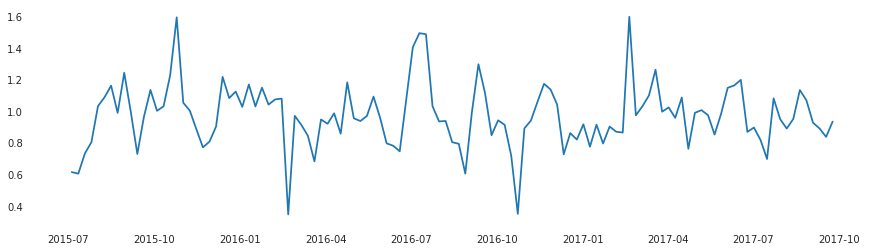

In [37]:
# Trực quan hóa resid
plt.figure(figsize=(15,4))
plt.plot(result.resid)
plt.show()

Residuals nhìn chung khá ổn định theo năm

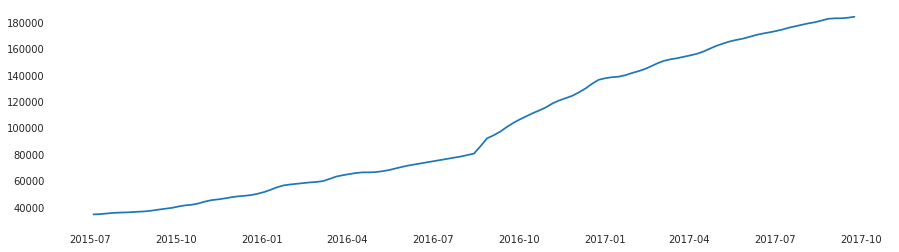

In [38]:
# Trực quan hóa trend
plt.figure(figsize=(15,4))
plt.plot(result.trend)
plt.show()

Sản lượng bơ tăng nhẹ từ tháng 07/2015 đến khoảng htangs 8/2016, sau đó tăng mạnh đều đến năm 2017

# ARIMA

In [39]:
stepwise_model = auto_arima(df_arima, start_p=2, start_q=2, 
                           max_p=5, max_q=5, m=12,
                           start_P=1, d=1, D=None, seasonal=True,
                           trace=True, error_action='ignore',
                           suppres_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4271.615, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4212.101, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4186.091, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4269.651, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4184.176, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=4185.497, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=4184.092, Time=0.27 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=4186.049, Time=0.63 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=4186.084, Time=0.59 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=4188.014, Time=0.39 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=4187.463, Time=0.27 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=4187.433, Time=1.33 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4274.226, Time=0.09 sec
 ARIMA(1,1,1)(1,0,1)[12]

In [40]:
# ACI
print(stepwise_model.aic())

4180.049907395502


In [41]:
# Chia tập dữ liệu train - 80%, test - 20%
train, test = df_arima.iloc[:135], df_arima.iloc[135:]

In [42]:
train.shape, test.shape

((135, 1), (34, 1))

In [43]:
train.head()

,y
ds,
2015-01-04,33443.5032
2015-01-11,30080.4791
2015-01-18,19145.9424
2015-01-25,28961.3864
2015-02-01,47666.8312


In [44]:
test.head()

,y
ds,
2017-08-06,137663.8039
2017-08-13,151751.1618
2017-08-20,198458.2320
2017-08-27,157333.5363
2017-09-03,175856.7256


In [45]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [46]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [47]:
future_forecast

array([158263.88798736, 156520.43403425, 157989.4811468 , 156751.65125456,
       157794.65581788, 156915.81250837, 157656.33233909, 157032.36488806,
       157558.12444749, 157115.11557921, 157488.39810704, 157173.86750604,
       157438.89330175, 157215.58061876, 157403.74552645, 157245.19639251,
       157378.79105786, 157266.22321113, 157361.07370598, 157281.15198201,
       157348.49461393, 157291.75121741, 157339.56362029, 157299.27653828,
       157333.22272963, 157304.61941935, 157328.72077878, 157308.41279621,
       157325.52445156, 157311.10604502, 157323.25510032, 157313.01821705,
       157321.64389012, 157314.37583461])

In [48]:
future_forecast = pd.DataFrame(future_forecast, index= test.index, columns=['Prediction'])
pred_arima = future_forecast.copy()
pred_arima['Actual'] = test.y
pred_arima

,Prediction,Actual
ds,,
2017-08-06,158263.887987,137663.8039
2017-08-13,156520.434034,151751.1618
2017-08-20,157989.481147,198458.2320
2017-08-27,156751.651255,157333.5363
2017-09-03,157794.655818,175856.7256
2017-09-10,156915.812508,186670.1574
2017-09-17,157656.332339,147536.9584
2017-09-24,157032.364888,144952.2914
2017-10-01,157558.124447,129791.7972


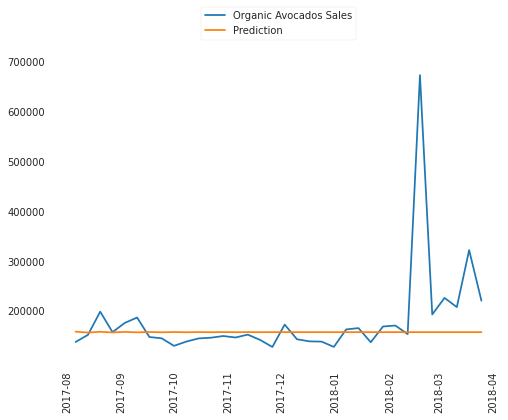

In [49]:
plt.plot(test, label = 'Organic Avocados Sales')
plt.plot(future_forecast, label = 'Prediction')
plt.xticks(rotation = 'vertical')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

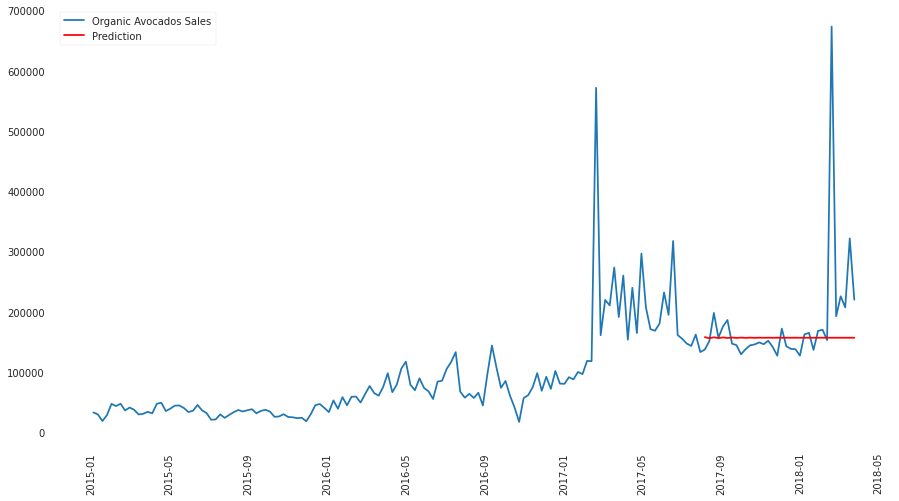

In [50]:
# Trực quan hóa dữ liệu cho cả tập Train và Test (Từ 2015-01-04 đến 2018-03-25)
plt.figure(figsize=(15,8))
plt.plot(df_arima, label = 'Organic Avocados Sales')
plt.plot(future_forecast, label = 'Prediction', color = 'red')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

Nhận xét: Kết quả dự đoán của Model Arima cho tập dữ liệu test gần như là không đổi, điều này cho thấy rằng mô mình ARIMA chưa thể phù hợp cho tập dữ liệ này. => Cần sử dụng một model khác cho bài toán này

In [51]:
mse_arima = mean_squared_error(test,future_forecast)
mae_arima = mean_absolute_error(test, future_forecast)

In [52]:
print('MSE: ', mse_arima)
print('MAE: ', mae_arima)

MSE:  9264580227.14363
MAE:  39205.55067638045


# HoltWinters

In [53]:
train.head()

,y
ds,
2015-01-04,33443.5032
2015-01-11,30080.4791
2015-01-18,19145.9424
2015-01-25,28961.3864
2015-02-01,47666.8312


In [54]:
train.tail()

,y
ds,
2017-07-02,155672.3660
2017-07-09,147717.7280
2017-07-16,143701.3611
2017-07-23,162593.3365
2017-07-30,133547.4920


In [55]:
test.head()

,y
ds,
2017-08-06,137663.8039
2017-08-13,151751.1618
2017-08-20,198458.2320
2017-08-27,157333.5363
2017-09-03,175856.7256


In [56]:
test.tail()

,y
ds,
2018-02-25,192861.6048
2018-03-04,226068.1228
2018-03-11,207578.9376
2018-03-18,322037.8680
2018-03-25,220416.6030


In [57]:
model_holt = ExponentialSmoothing(train, seasonal='add',
                             trend = 'add',
                             damped_trend=False,
                             seasonal_periods= 52).fit()
pred_holt = model_holt.predict(start=test.index[0], 
                     end=test.index[-1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [58]:
pred = pd.DataFrame(pred_holt,columns=[ 'Predict'])
# pred_holt = pred.copy()
# pred_holt['Actual'] = test.y
pred

,Predict
2017-08-06,170064.318933
2017-08-13,173659.239165
2017-08-20,171245.056323
2017-08-27,173288.816052
2017-09-03,174748.006362
2017-09-10,167537.155124
2017-09-17,171253.094491
2017-09-24,172723.200813
2017-10-01,168913.271276
2017-10-08,159791.182457


In [59]:
start=test.index[0], 
end=test.index[-1]
start, end

((Timestamp('2017-08-06 00:00:00'),), Timestamp('2018-03-25 00:00:00'))

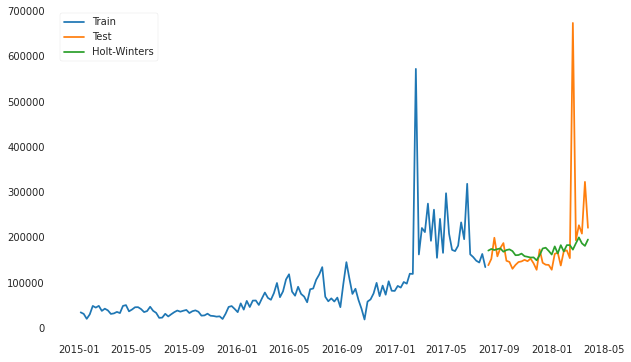

In [60]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

In [61]:
mse_holt = mean_squared_error(test,pred)
mae_holt = mean_absolute_error(test, pred)
print('MSE - Holt: ', mse_holt)
print('MAE - Holt: ', mae_holt)

MSE - Holt:  8487266810.639445
MAE - Holt:  37969.45468558069


# Dự đoán 3 năm tiếp theo

In [62]:
s = datetime.datetime(2018, 4, 1)
e = datetime.datetime(2021, 4, 1)
pred_next_3_years = model_holt.predict(start= s, end=e)
pred_next_3_years 

2018-04-01    216266.123797
2018-04-08    184369.025584
2018-04-15    196957.068604
2018-04-22    223688.777606
2018-04-29    235304.923037
                  ...      
2021-03-07    235279.744497
2021-03-14    229627.291925
2021-03-21    243736.769486
2021-03-28    265492.625557
2021-04-04    233595.527344
Freq: W-SUN, Length: 158, dtype: float64

In [63]:
x = pd.Series(pred_next_3_years)

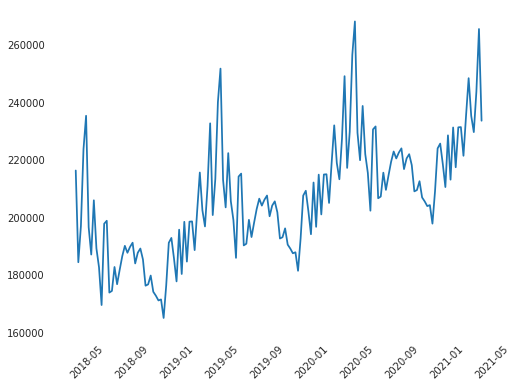

In [64]:
plt.figure(figsize=(8,6))
plt.plot(x.index, x.values)
plt.xticks(rotation = 45)
plt.show()

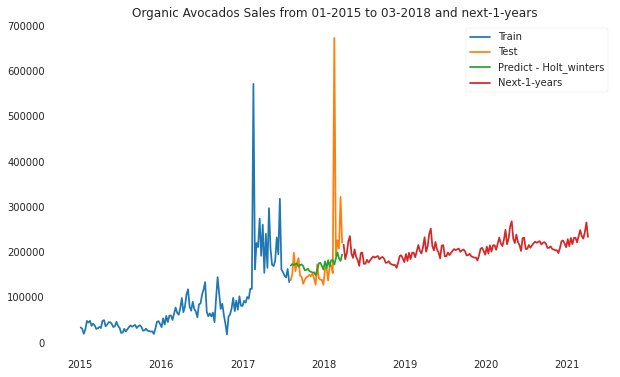

In [65]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(pred.index, pred, label = 'Predict - Holt_winters')
plt.plot(x.index, x.values, label = 'Next-1-years')
plt.legend(loc = 'best')
plt.title('Organic Avocados Sales from 01-2015 to 03-2018 and next-1-years')
plt.show()

## Facebook Prophet

In [66]:
# Train va test: Train: 80%, test: 20%
# Total: 169 => Train: 135, Test: 34
train = df4.drop(df4.index[-34:])
test = df4.drop(df4.index[0:-34])

In [67]:
train.head()

,ds,y
0,2015-01-04,33443.5032
1,2015-01-11,30080.4791
2,2015-01-18,19145.9424
3,2015-01-25,28961.3864
4,2015-02-01,47666.8312


In [68]:
train.tail()

,ds,y
130,2017-07-02,155672.3660
131,2017-07-09,147717.7280
132,2017-07-16,143701.3611
133,2017-07-23,162593.3365
134,2017-07-30,133547.4920


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      135 non-null    datetime64[ns]
 1   y       135 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [70]:
test.head()

,ds,y
135,2017-08-06,137663.8039
136,2017-08-13,151751.1618
137,2017-08-20,198458.2320
138,2017-08-27,157333.5363
139,2017-09-03,175856.7256


In [71]:
test.tail()

,ds,y
164,2018-02-25,192861.6048
165,2018-03-04,226068.1228
166,2018-03-11,207578.9376
167,2018-03-18,322037.8680
168,2018-03-25,220416.6030


In [72]:
threshold_date = pd.to_datetime('2017-07-30')

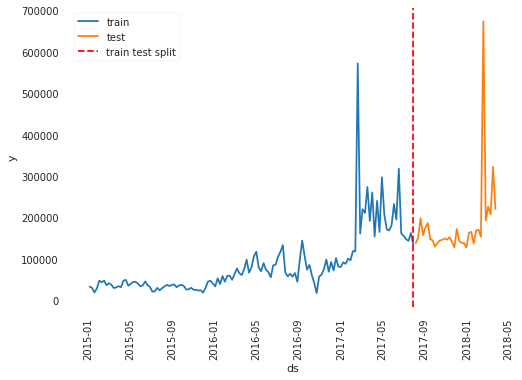

In [73]:
fig, ax = plt.subplots()
sns.lineplot(x='ds', y='y', label='train', data=train, ax=ax)
sns.lineplot(x='ds', y='y', label='test', data=test, ax=ax)
ax.axvline(threshold_date, linestyle='--', label='train test split', color = 'r')
ax.legend(loc='upper left')
plt.xticks(rotation = 90)
plt.show()

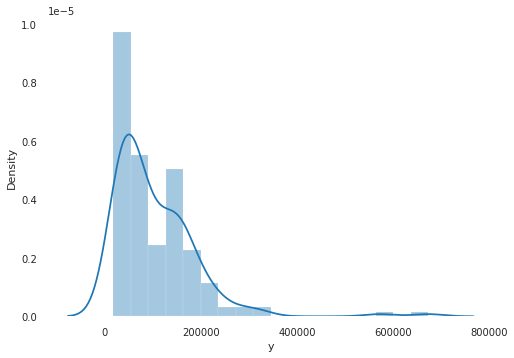

In [74]:
sns.distplot(df4.y)

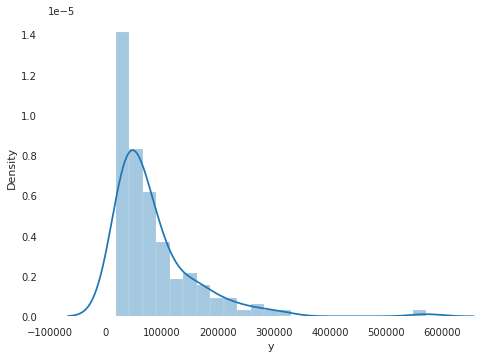

In [75]:
sns.distplot(train.y)

In [76]:
model_prp = Prophet(yearly_seasonality=True, \
                daily_seasonality = False, weekly_seasonality = False)

In [77]:
model_prp.fit(train)

In [78]:
# 34 weeks in test and 1 years to predict new values
weeks = pd.date_range('2017-08-06','2019-03-25',freq = 'W').strftime('%Y-%m-%d').tolist()
future = pd.DataFrame(weeks)
                  

In [79]:
future.head()

,0
0,2017-08-06
1,2017-08-13
2,2017-08-20
3,2017-08-27
4,2017-09-03


In [80]:
future.columns = ['ds']

In [81]:
future['ds'] = pd.to_datetime(future['ds'])

In [82]:
future.head()

,ds
0,2017-08-06
1,2017-08-13
2,2017-08-20
3,2017-08-27
4,2017-09-03


In [83]:
future.tail()

,ds
81,2019-02-24
82,2019-03-03
83,2019-03-10
84,2019-03-17
85,2019-03-24


In [84]:
# Use the model to make a forecast
forecast = model_prp.predict(future)

In [85]:
forecast[['ds','yhat']].tail()

,ds,yhat
81,2019-02-24,407669.471550
82,2019-03-03,390453.497774
83,2019-03-10,374218.545534
84,2019-03-17,373866.832967
85,2019-03-24,383524.705626


In [86]:
df4.y.mean()

104117.99239999999

In [87]:
test.y.mean()

179343.82315294116

In [88]:
y_test = test['y'].values

In [89]:
y_pred = forecast['yhat'].values[:34]
y_pred

array([163848.10718426, 168996.11096669, 178004.93571498, 185372.99331974,
       191421.00303105, 199110.13675875, 206069.42450661, 204438.93091129,
       190518.47874727, 171884.19385403, 161448.24320022, 164414.99215429,
       173778.74513468, 179709.69380549, 180809.26351353, 183331.15714697,
       190570.20605553, 197501.04908118, 198222.41556451, 195729.79283981,
       199451.63845454, 212326.51479748, 224742.81793701, 225604.75745066,
       218339.9518272 , 220693.55910417, 245368.24308713, 283044.93263988,
       309039.45603975, 307999.19732809, 289212.07086781, 275281.17090838,
       277696.7480239 , 287441.84738916])

In [90]:
mse_prp = mean_squared_error(y_test,y_pred)
mae_prp = mean_absolute_error(y_test, y_pred)
print('MSE - FBProphet: ', mse_prp)
print('MAE - FBProphet: ', mae_prp)

MSE - FBProphet:  7091999427.652055
MAE - FBProphet:  59466.77498202317


##### Visulaize

In [91]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])


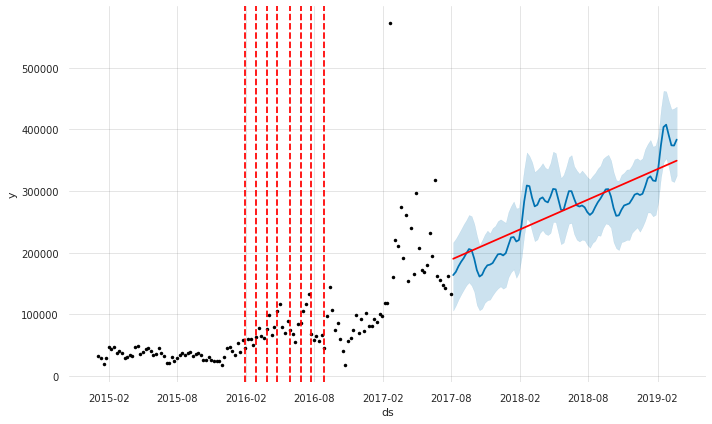

In [92]:
fig = model_prp.plot(forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), model_prp, forecast)

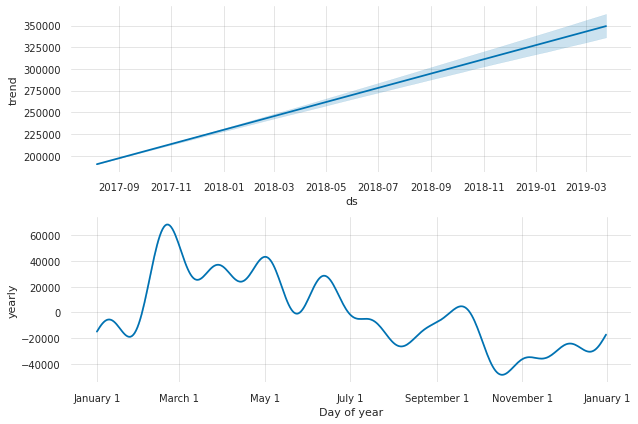

In [93]:
fig1 = model_prp.plot_components(forecast)
fig1.show()

In [94]:
forecast[['ds','yhat']].tail(52)

,ds,yhat
34,2018-04-01,289844.501808
35,2018-04-08,283814.725206
36,2018-04-15,281709.836275
37,2018-04-22,291270.297762
38,2018-04-29,303554.591048
39,2018-05-06,302829.669339
40,2018-05-13,286427.243546
41,2018-05-20,269723.549052
42,2018-05-27,269474.486770
43,2018-06-03,285117.313916


Long term prdiction for the next prediction - 3 years



In [95]:
model = Prophet(yearly_seasonality= True,\
            daily_seasonality = False, weekly_seasonality = False)

In [96]:
model.fit(df4)

In [97]:
future_3years = model.make_future_dataframe(periods=52*3, freq = 'W') # Next 3 years

In [99]:
forecast_3years =model.predict(future_3years)

In [100]:
forecast_3years.shape

(325, 16)

In [101]:
forecast_3years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          325 non-null    datetime64[ns]
 1   trend                       325 non-null    float64       
 2   yhat_lower                  325 non-null    float64       
 3   yhat_upper                  325 non-null    float64       
 4   trend_lower                 325 non-null    float64       
 5   trend_upper                 325 non-null    float64       
 6   additive_terms              325 non-null    float64       
 7   additive_terms_lower        325 non-null    float64       
 8   additive_terms_upper        325 non-null    float64       
 9   yearly                      325 non-null    float64       
 10  yearly_lower                325 non-null    float64       
 11  yearly_upper                325 non-null    float64       

In [102]:
forecast_years.columns

NameError: ignored

In [103]:
forecast_3years[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
313,2021-01-03,403114.530449,341326.012718,475851.747227,420293.328079,412925.904200,427666.770579
314,2021-01-10,412617.812492,345858.406365,477749.850827,421696.619700,414297.828941,429155.408650
315,2021-01-17,401644.107232,332016.058653,466445.908738,423099.911320,415691.808433,430612.258412
316,2021-01-24,390249.646184,327641.236157,459324.143316,424503.202941,417015.469875,432140.063453
317,2021-01-31,407950.037269,343026.298606,471035.151507,425906.494562,418344.487077,433617.676276
318,2021-02-07,458245.915785,392929.838871,524122.708206,427309.786183,419666.873496,435082.214144
319,2021-02-14,509076.545462,445653.968291,574473.911369,428713.077804,420996.806549,436522.881297
320,2021-02-21,523492.116716,459114.206678,589832.038909,430116.369425,422326.929432,438012.503764
321,2021-02-28,497721.564035,433665.517363,565161.478610,431519.661046,423646.685537,439489.244935
322,2021-03-07,463774.037968,394784.949418,530401.870007,432922.952666,424930.952921,440957.633950


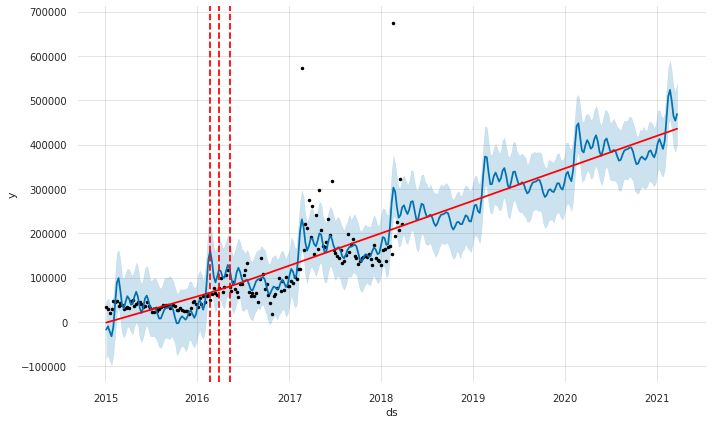

In [104]:
fig = model.plot(forecast_3years)
fig.show()
a = add_changepoints_to_plot(fig.gca(),model,forecast_3years)

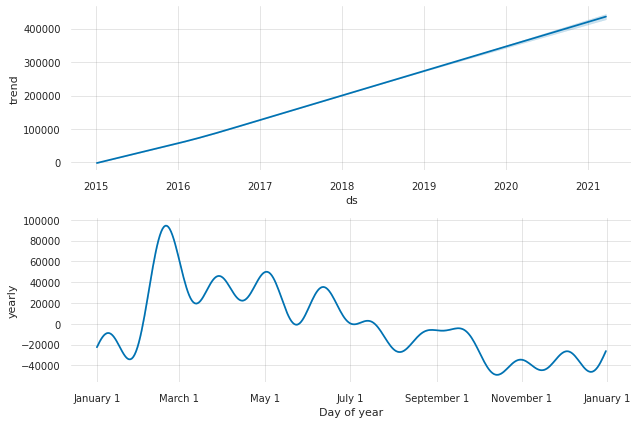

In [106]:
fig1 = model.plot_components(forecast_3years)
fig1.show()

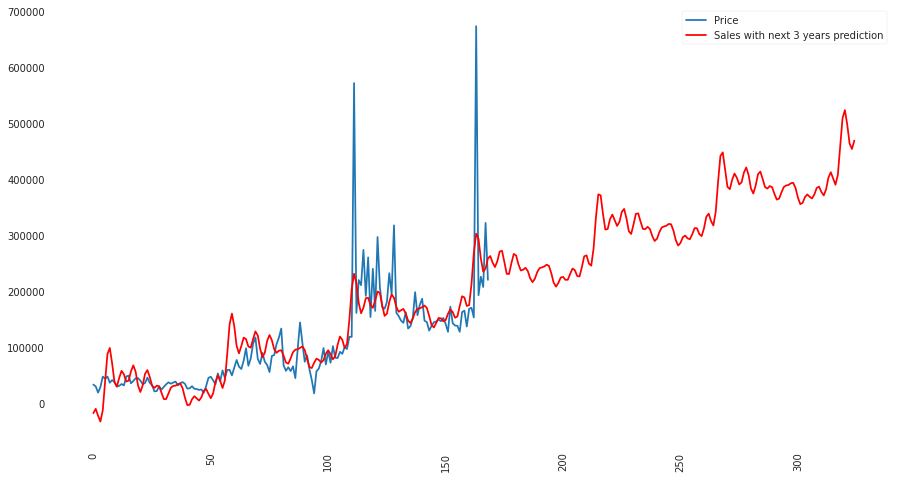

In [108]:
plt.figure(figsize=(15,8))
plt.plot(df4['y'], label='Price')
plt.plot(forecast_3years['yhat'], label='Sales with next 3 years prediction', 
         color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


# So sánh và lựa chọn Model

In [109]:
df_cv = pd.DataFrame({'model': ['ARIMA', 'Holt-Winters', 'FbProphet'], 'MSE': [mse_arima, mse_holt, mse_prp], 'MAE': [mae_arima, mae_holt, mae_prp]})
df_cv

,model,MSE,MAE
0,ARIMA,9.264580e+09,39205.550676
1,Holt-Winters,8.487267e+09,37969.454686
2,FbProphet,7.091999e+09,59466.774982


Mô hình ARIMA chưa áp dụng được tốt vào bài toán này
Cả hai mô hình FBProphet và Holt-Winters đều có thể dùng để dự đoán doanh số bơ organic tại NewYork. Tuy nhiên mô hình FB Prophet  có chỉ số MSE/MAE thấp hơn so với mô hình Holt-Winters, do đó, có thể chọn FB Prophet để thực hiện việc dự đoán giá bơ organic

In [111]:
# Lưu kết quả dự đoán doanh số bơ ordanic của 1 năm tiếp theo
df_predict = pd.DataFrame(forecast[['ds','yhat']].tail(52))
df_predict.head()

,ds,yhat
34,2018-04-01,289844.501808
35,2018-04-08,283814.725206
36,2018-04-15,281709.836275
37,2018-04-22,291270.297762
38,2018-04-29,303554.591048


# Kết luận: 
- kết quả dự đoán rằng doanh số bán hàng của bơ organic tại Bang NewYork của các Model là tăng trong tương lai.
- Vì vậy tương lai có thể mở rộng kinh doanh tại NewYork

# Lưu Model

In [112]:
import pickle
pkl_filename = 'Cau4_PJ1.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_prp, file)